In [33]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
website_url = 'https://countrymusichalloffame.org/hall-of-fame/members/'
response = requests.get(website_url)

response.status_code

200

In [3]:
soup = BeautifulSoup(response.content, 'lxml')
print(soup.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [4]:
#print(soup)

Can i get my code to pick up the right items?  

In [5]:
#inductees = soup.find_all(attrs = {'class':'vertical-card'})
#inductees

In [6]:
#type(inductees)

NameError: name 'inductees' is not defined

In [ ]:
#len(inductees)

GITHUB CLASS ASSIGNMENT

#1: Start by using either the inspector or by viewing the page source. Can you identify a tag that might be helpful for finding the names of all inductees? Make use of this to create a list containing just the names of each inductee.

So, i have: 
response - the website
soup - my soup object
and inductees - which is something, but maybe not right?

In [7]:
namelist = []
for names in soup.find_all('h3'):
    namelist.append(names.get_text())
namelist

['Roy Acuff',
 'Alabama',
 'Bill Anderson',
 'Eddy Arnold',
 'Chet Atkins',
 'Gene Autry',
 'DeFord Bailey',
 'Bobby Bare',
 'Johnny Bond']

#2 Next, try and find a tag that could be used to find the year that each member was inducted. Extract these into a list. When you do this, be sure to only include the year and not the full text. For example, for Roy Acuff, the list entry should be "1962" and not "Inducted 1962". Double-check that the resulting list has the correct number of elements and is in the same order as your inductees list.

In [8]:
yearlistdirty = []
#regex1 = re.compile(r"\d{4}") NOPE!  There's too much code that fits this parameter ... 
regex1 = re.compile(r"Inducted")
for year in soup.find_all(text = regex1):
    yearlistdirty.append(year)
yearlistdirty

['\n                    Inducted 1962                  ',
 '\n                    Inducted 2005                  ',
 '\n                    Inducted 2001                  ',
 '\n                    Inducted 1966                  ',
 '\n                    Inducted 1973                  ',
 '\n                    Inducted 1969                  ',
 '\n                    Inducted 2005                  ',
 '\n                    Inducted 2013                  ',
 '\n                    Inducted 1999                  ']

In [9]:
yearlist = []
for text in yearlistdirty:
    yearlist.append(text[-22:-18])
yearlist

['1962', '2005', '2001', '1966', '1973', '1969', '2005', '2013', '1999']

#3: Take the two lists you created on parts 1 and 2 and convert it into a pandas DataFrame.

In [10]:
inductees = pd.DataFrame()
inductees['names'] = namelist
inductees['induction year'] = yearlist
inductees

,names,induction year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
5,Gene Autry,1969
6,DeFord Bailey,2005
7,Bobby Bare,2013
8,Johnny Bond,1999


#4: Now, you need to take what you created for the first page and apply it across the rest of the pages so that you can scrape all inductees. Notice that when you click the next page button at the bottom of the page that the url changes to "https://countrymusichalloffame.org/hall-of-fame/members/page/2". Check that the code that you wrote for the first page still works for page 2. Once you have verified that your code will still work, write a for loop that will cycle through all 16 pages and build a DataFrame containing all inductees and the year of their induction.

In [11]:
website_url2 = 'https://countrymusichalloffame.org/hall-of-fame/members/page2'
response2 = requests.get(website_url2)

response2.status_code

200

In [12]:
soup2 = BeautifulSoup(response2.content, 'lxml')
print(soup2.title)

<title>Hall of Fame Members | Country Music Hall of Fame</title>


In [13]:
namelist2 = []
for names in soup2.find_all('h3'):
    namelist2.append(names.get_text())
namelist2

['Bobby Braddock',
 'Harold Bradley',
 'Jerry Bradley',
 'Owen Bradley',
 'Rod Brasfield',
 'Garth Brooks',
 'Brooks & Dunn',
 'Jim Ed Brown',
 'Jim Ed Brown and the Browns']

okay!  it looks like it's working ... now to play with a for-loop ...

In [17]:
page1 = "https://countrymusichalloffame.org/hall-of-fame/members/"
pagesall = "https://countrymusichalloffame.org/hall-of-fame/members/page/" #no pages so code can choose
startpage = 2
lastpage = 17 #16 + 1 because python

namelistall = []
yearlistalldirty = []
wholesite = []
yearlistall = []


In [18]:
for x in range(startpage, lastpage):
    wholesite.append(pagesall + str(x))
wholesite
#not sure how to get page 1 in there ... but i'll figure out later.  technically i already have.  maybe a join?
#nope - figured it out!
#also note - repeating this cell over and over again stacks the pages on top of one another, repeating info. 
#had to rerun kernel

wholesite.append(page1)

['https://countrymusichalloffame.org/hall-of-fame/members/',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/2',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/3',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/4',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/5',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/6',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/7',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/8',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/9',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/10',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/11',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/12',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/13',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/14',
 'https://countrymusichalloffame.org/hall-of-fame/members/page/

In [19]:
for site in wholesite:
    responseall = requests.get(site)
    soupall = BeautifulSoup(responseall.content, 'lxml')
    for names in soupall.find_all('h3'):
        namelistall.append(names.get_text())
    regexall = re.compile(r"Inducted")
    for year in soupall.find_all(text = regexall):
        yearlistalldirty.append(year)

#note - this forloop didn't work until i fixed my wholesite list to include the first page.  
#i guess because it didn't know where to start otherwise?
#once i got the firstpage in there, it worked fine like all the other ones i did.

list comprehension:  artist_list = [artist.text for artist in artist_names]
lets you do the for names in soupalll function above all in one line instead of 3
a more elegant and efficient way of doing the same thing

if you find yourself initializing an empty list and then appending to it - it's worth thinking if you couldn't do it easier with a list comprehension

how andrew got the years:
year_inducted_soup = soup.find_all('p')
year_inducted_soup = soup.find_all('div', attrs = {class': "vertical-card_content--copy"})
years_inducted = [int(re.findall("\d+", year_str.text)[0]) for year_str in year_inducted_soup
                    if re.match("\s+Inducted\s\d+\s+", year_str.text)]

In [22]:
#namelistall
#yearlistalldirty

for x in yearlistalldirty:
    yearlistall.append(x[-22:-18])
yearlistall

['1962',
 '2005',
 '2001',
 '1966',
 '1973',
 '1969',
 '2005',
 '2013',
 '1999',
 '2011',
 '2006',
 '2019',
 '1974',
 '1987',
 '2012',
 '2019',
 '2015',
 '2015',
 '1991',
 '2005',
 '2002',
 '1970',
 '1980',
 '2009',
 '2013',
 '1973',
 '2014',
 '1976',
 '2003',
 '1981',
 '2016',
 '1972',
 '2010',
 '2001',
 '1966',
 '1983',
 '2007',
 '2001',
 '1985',
 '2004',
 '1967',
 '1990',
 '2016',
 '1967',
 '1982',
 '1980',
 '2001',
 '2007',
 '2018',
 '1994',
 '2008',
 '2008',
 '1966',
 '2001',
 '1982',
 '1997',
 '2010',
 '2017',
 '2006',
 '2001',
 '1992',
 '1978',
 '2001',
 '1974',
 '2004',
 '2001',
 '1997',
 '1979',
 '2001',
 '1988',
 '1966',
 '2009',
 '2015',
 '2009',
 '2011',
 '1995',
 '2014',
 '1970',
 '1996',
 '1998',
 '2001',
 '1993',
 '2015',
 '1996',
 '1999',
 '1975',
 '1984',
 '2001',
 '2001',
 '1998',
 '1992',
 '1996',
 '2000',
 '2017',
 '1967',
 '1964',
 '2012',
 '1982',
 '1961',
 '2013',
 '1988',
 '1961',
 '1986',
 '1971',
 '2017',
 '2011',
 '2010',
 '1967',
 '2018',
 '2003',
 '2012',
 

In [23]:
allinductees = pd.DataFrame()
allinductees['names'] = namelistall
allinductees['induction year'] = yearlistall
allinductees

,names,induction year
0,Roy Acuff,1962
1,Alabama,2005
2,Bill Anderson,2001
3,Eddy Arnold,1966
4,Chet Atkins,1973
...,...,...
135,Hank Williams,1961
136,Bob Wills,1968
137,Mac Wiseman,2014
138,Tammy Wynette,1998


#5: Create a visual using the data that you scraped. Prepare a short (<5 minute) presentation.

In [35]:
allinductees.value_counts("induction year")
allinductees.value_counts("names")

names
Alabama                     1
Merle Travis                1
Little Jimmy Dickens        1
Loretta Lynn                1
Mac Wiseman                 1
                           ..
Ernest V. “Pop” Stoneman    1
Ernest Tubb                 1
Emmylou Harris              1
Elvis Presley               1
​Jerry Reed                 1
Length: 140, dtype: int64

<AxesSubplot:>

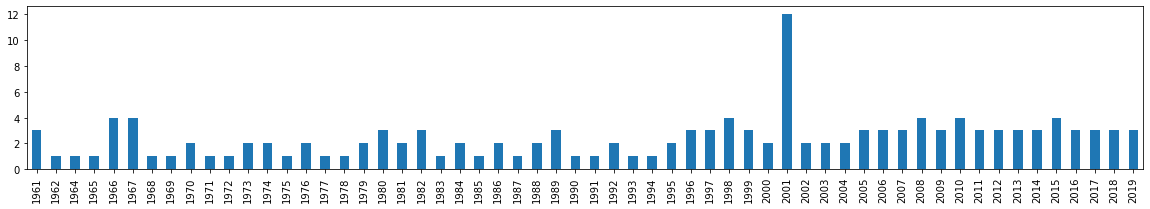

In [32]:
allinductees['induction year'].value_counts().sort_index().plot(kind= 'bar', figsize=(20,3))

#Holland Griffis' cool graph code:

In [ ]:
group = dfsorted.groupby('Inducted').count().reset_index()
group = group.rename({'Name': 'Count'}, axis=1)
plt.figure(figsize=(20,10))
plt.bar(group['Inducted'],height = group['Count'])
plt.xlabel('Year',fontsize=20)
plt.ylabel('# Inducted',fontsize=20)
plt.title('Hall of Fame Inductees',fontsize=30)
plt.grid(True, color = 'black')
plt.xticks(fontsize=20)
plt.savefig('../images/count2.png', transparent = True)
plt.show()

In [51]:
#well, i was trying to get a len to count the blank spaces between the names - to get the number of words in a name ...
#but i'm not figuring it out this time around.  So ... total length of name it is?

allinductees['len']=allinductees.apply(lambda x: len(x.names), axis=1)
allinductees

,names,induction year,len
0,Roy Acuff,1962,9
1,Alabama,2005,7
2,Bill Anderson,2001,13
3,Eddy Arnold,1966,11
4,Chet Atkins,1973,11
...,...,...,...
135,Hank Williams,1961,13
136,Bob Wills,1968,9
137,Mac Wiseman,2014,11
138,Tammy Wynette,1998,13


all my numbers/years may be showing on x-axis possibly because the type is object and not integer.  

In [57]:
#re.findall(r"\s+", allinductees['names'])
#nope ... not working

In [58]:
allinductees.value_counts("len")

len
13    31
12    26
11    22
10    17
14    10
9      8
19     6
20     5
16     4
15     3
7      2
17     2
27     2
18     1
24     1
dtype: int64

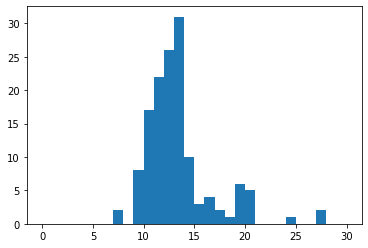

In [76]:
plt.hist(allinductees['len'], range=[0,30], bins=30)
plt.show()
#why can't i get labels to work!?  

Derek Price's pretty scatterplot thing:

In [1]:
sns.stripplot(y = sorted_df["Induction Year"], x = sorted_df['namelen'])
plt.title("Name lengths of Winners Over Decades")
plt.show()

NameError: name 'sns' is not defined